In [1]:
import numpy as np
import pandas as pd
%matplotlib inline


In [12]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 13].values

In [21]:
x[0:2]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ]])

In [20]:
y[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [36]:
#data preprocessing: feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [37]:
x_train[0:1]

array([[ 0.35256528,  0.70243936,  0.9870291 ,  0.02020565, -0.43596979,
        -0.42695628, -0.9825655 ,  1.01189274, -0.72352604,  1.72483977,
         0.96222601,  1.22723311,  1.12135917]])

In [38]:
x_test[0:1]

array([[ 1.88467414,  0.61791438, -1.00073126,  0.73414677, -1.58011928,
        -0.38924947,  0.92393644, -1.17273867,  1.61834719,  1.85739818,
        -2.27884246, -0.73740853,  1.15114507]])

In [40]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

C:\Users\veliv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
# predicting the test set results

y_pred = classifier.predict(x_test)

In [58]:
# creating the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[24,  9],
       [ 4, 39]], dtype=int64)

In [54]:
# visualizing the training set results:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min() - 1, stop = x_set[:,0].max()+1, step = 0.01), 
                     np.arange(start = x_set[:,0].min()-1, stop =x_set[:,0].max()+1, step = 0.01))
#plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75,cmap = ListedColormap(("red", "green")))

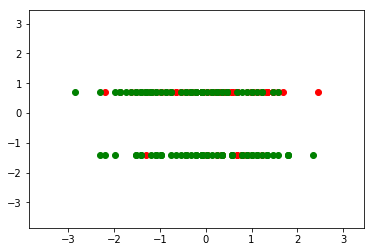

In [57]:
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set ==j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)